In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, RidgeClassifier, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

# TASK 1

In [2]:
original_df = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\1LAB\Lab1\Datasets/cardio-train.csv",sep = ';')

In [3]:
original_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74393,NaN,Women,174.0,73.0,130.0,NaN,NaN,Normal,0.0,0.0,1.0,1
496,38938,NaN,Men,NaN,89.0,130.0,NaN,High,Normal,0.0,0.0,NaN,1
497,9037,NaN,Women,180.0,84.0,NaN,NaN,Normal,Above Normal,1.0,0.0,1.0,0
498,27539,NaN,Women,NaN,NaN,110.0,70.0,NaN,NaN,NaN,0.0,1.0,0


#### 1. Identify the dataset columns into nominal, categorical, continues etc. categories:

 - ID : Numerical
 - age : Numerical
 - gender : catagorical 
 - height : Numerical
 - weight : Numerical
 - ap_hi : Numerical
 - ap_lo : Numerical
 - cholestrol : catagorical
 - glucose : catgorical
 - smoke : nominal(binary)
 - active : nominal(binary)
 - cardio : nominal(binary)

#### 2. Use dataframe.info and dataframe.describe to get the insights about the data.

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


In [5]:
original_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,500.0,50279.916000,29913.623631,38.0,23446.50,51913.5,78656.0,99662.0
age,335.0,19490.886567,2466.702487,14334.0,17988.50,19719.0,21597.5,23479.0
height,198.0,163.934343,8.258559,120.0,159.25,165.0,168.0,187.0
weight,336.0,74.347321,14.335964,45.0,65.00,72.0,82.0,155.0
ap_hi,347.0,128.685879,18.490176,12.0,120.00,120.0,140.0,190.0
ap_lo,332.0,90.060241,87.396945,60.0,80.00,80.0,90.0,1000.0
smoke,326.0,0.092025,0.289505,0.0,0.00,0.0,0.0,1.0
alco,335.0,0.065672,0.248078,0.0,0.00,0.0,0.0,1.0
active,343.0,0.813411,0.390150,0.0,1.00,1.0,1.0,1.0
cardio,500.0,0.502000,0.500497,0.0,0.00,1.0,1.0,1.0


#### 3. Find the number of null values for each columns

In [6]:
original_df.isnull().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

#### 4. Know about the patients (Example of analysis for ages)

##### a. Oldest person

In [7]:
print(original_df['age'].max())
original_df[original_df['age'] == 23479.0] 

23479.0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
485,75606,23479.0,NaN,NaN,NaN,120.0,80.0,Normal,NaN,0.0,NaN,1.0,1


##### b. Youngest person

In [8]:
print(original_df['age'].min())
original_df[original_df['age'] == 14334.0]

14334.0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
147,44000,14334.0,NaN,163.0,NaN,130.0,NaN,Normal,NaN,0.0,0.0,NaN,0


##### c. Average age group

In [9]:
print(original_df['age'].mean())

19490.88656716418


##### d. Median age

In [10]:
print(original_df['age'].median())

19719.0


##### e. Relationship between cardio and age

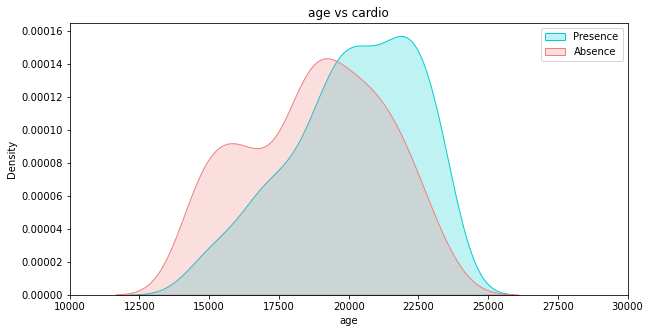

In [11]:
plt.figure(figsize=(10,5))

sns.kdeplot(original_df.age[original_df.cardio == 1], color='darkturquoise', shade=True)
sns.kdeplot(original_df.age[original_df.cardio == 0], color='lightcoral', shade=True)

plt.legend(['Presence', 'Absence'])
plt.title('age vs cardio')
plt.xlim(10000,30000)
#plt.show()
plt.savefig('kde_agevscardio.jpeg')

##### f. Find the age groups whose survival rate is the largest

In [12]:
# gives mean of age groups with cardio presence and absence separately.
print(original_df.groupby('cardio').max()['age']) 

# from the kdeplot and groupby we can conclude the avg age group without cardio(largest survival rate) is 51 yrs (18787 days)
print(f"\nLargest surival rate age group : {round(23407/365)}") 

cardio
0    23407.0
1    23479.0
Name: age, dtype: float64

Largest surival rate age group : 64


In [13]:
age_to_yrs_df = original_df.copy()
age_to_yrs_df['age'] = age_to_yrs_df['age'].fillna(0)
age_to_yrs_df['age'] = age_to_yrs_df['age'].map(lambda x:round(x/365))

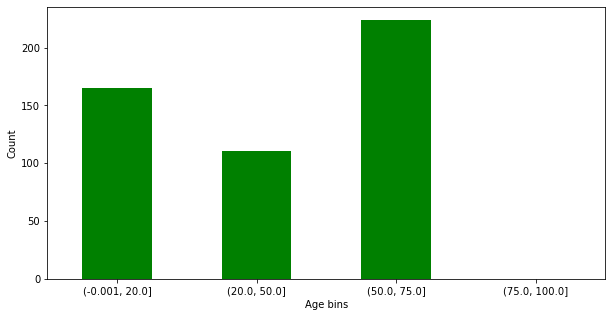

In [14]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(age_to_yrs_df.age, bins=bins,include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(10,5))

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

##### g. similar relationships for other columns

In [15]:
# to find features which affects the cardio the most
original_df.corr()['cardio'].sort_values()

active   -0.084628
smoke    -0.042448
alco     -0.037604
id        0.070751
ap_lo     0.123913
height    0.129126
weight    0.166135
age       0.276179
ap_hi     0.437948
cardio    1.000000
Name: cardio, dtype: float64

In [16]:
# ap_hi relationship with cardio

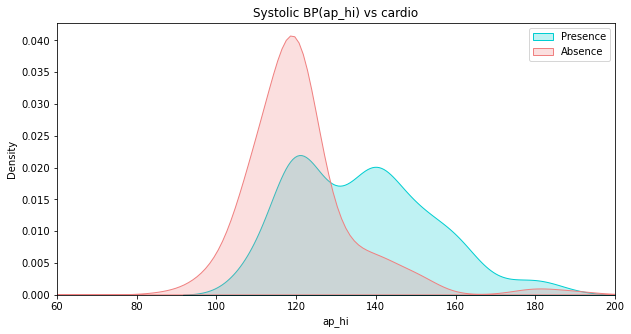

In [17]:
plt.figure(figsize=(10,5))

sns.kdeplot(original_df.ap_hi[original_df.cardio == 1], color='darkturquoise', shade=True)
sns.kdeplot(original_df.ap_hi[original_df.cardio == 0], color='lightcoral', shade=True)

plt.legend(['Presence', 'Absence'])
plt.title('Systolic BP(ap_hi) vs cardio')
plt.xlim(60,200)
plt.show()

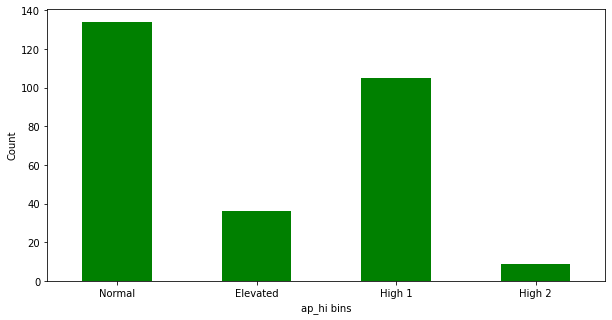

In [18]:
bins = [120, 129, 139, 179, 200]

out = pd.cut(original_df.ap_hi, bins=bins,include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(10,5))

ax.set_xticklabels(['Normal','Elevated','High 1','High 2'])
plt.xlabel('ap_hi bins')
plt.ylabel('Count')
plt.show()
#plt.savefig('bar_aphi.jpeg')

In [19]:
# weight relationship with cardio

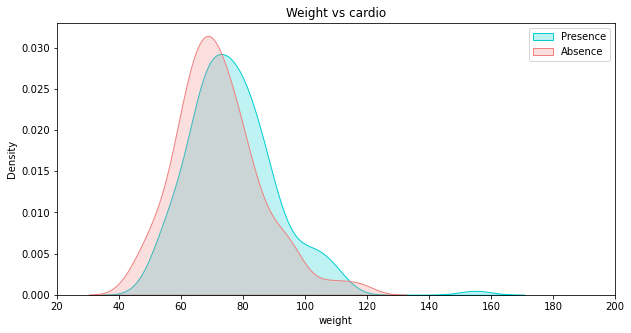

In [20]:
plt.figure(figsize=(10,5))

sns.kdeplot(original_df.weight[original_df.cardio == 1], color='darkturquoise', shade=True)
sns.kdeplot(original_df.weight[original_df.cardio == 0], color='lightcoral', shade=True)

plt.legend(['Presence', 'Absence'])
plt.title('Weight vs cardio')
plt.xlim(20,200)
#plt.show()
plt.savefig('kde_weightvscardio.jpeg')

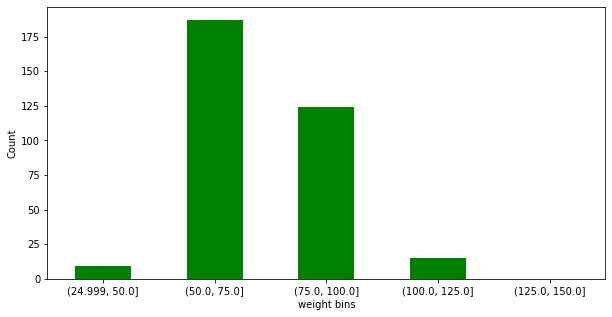

In [21]:
bins = [25, 50, 75, 100, 125, 150]

out = pd.cut(original_df.weight, bins=bins,include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(10,5))

plt.xlabel('weight bins')
plt.ylabel('Count')
#plt.show()
plt.savefig('bar_weightvsacrdio.jpeg')

In [22]:
# other features relationship with cardio

In [23]:
base_color = sns.color_palette()[0]
def barplots(df):
    fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10), sharey=True)
    plt.tight_layout(pad=3)
    ax[1][2].set_visible(False)

    df_gluc = df.groupby('gluc').mean()
    sns.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
    ax[0][0].set_xticklabels(['normal', 'above normal', 'high'])
    ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
    ax[0][0].set_yticklabels(np.arange(0, 120, 10))

    df_cholesterol = df.groupby('cholesterol').mean()
    sns.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
    ax[0][1].set_xticklabels(['normal', 'above normal', 'high'])

    df_smoke = df.groupby('smoke').mean()
    sns.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

    df_alco = df.groupby('alco').mean()
    sns.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

    df_active = df.groupby('active').mean()
    sns.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

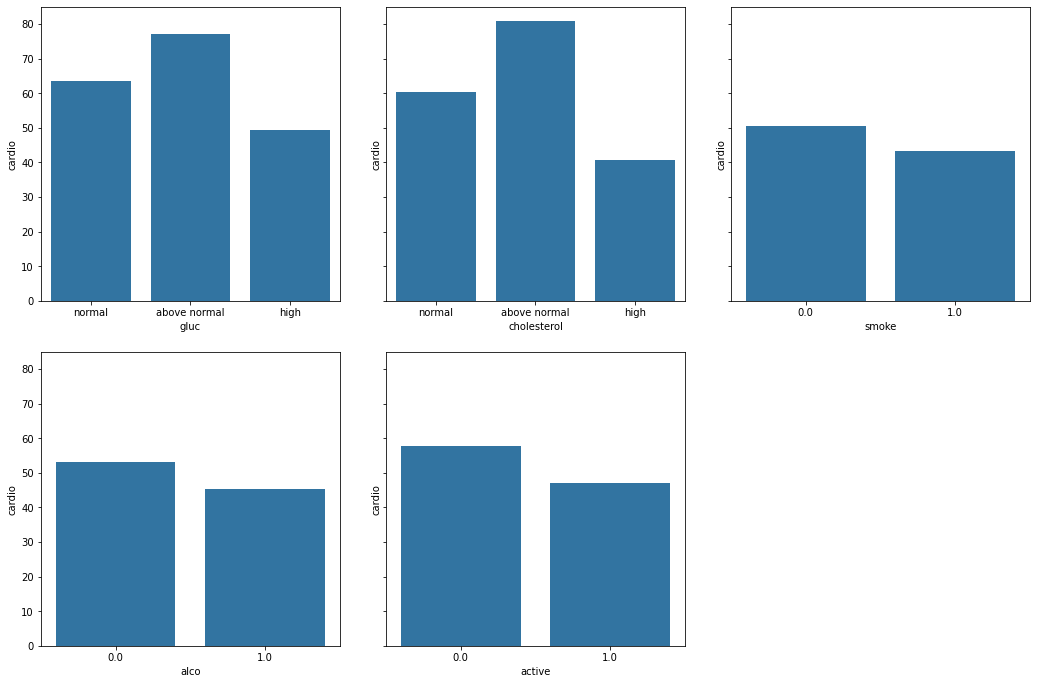

In [24]:
barplots(original_df)

##### h. Get more visuals on data distributions

In [25]:
# i. Use plotCorrelationMatrix
original_df.drop(columns = 'id').corr()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
age,1.000000,0.009076,0.121196,0.254253,0.110386,-0.035227,-0.124718,-0.015044,0.276179
height,0.009076,1.000000,0.335717,0.039363,-0.028233,0.138822,0.140835,0.087362,0.129126
weight,0.121196,0.335717,1.000000,0.218827,-0.070614,-0.030079,0.113785,-0.051088,0.166135
ap_hi,0.254253,0.039363,0.218827,1.000000,0.236806,0.013357,0.061120,-0.083521,0.437948
ap_lo,0.110386,-0.028233,-0.070614,0.236806,1.000000,-0.013922,-0.013204,-0.026537,0.123913
smoke,-0.035227,0.138822,-0.030079,0.013357,-0.013922,1.000000,0.353565,0.001920,-0.042448
alco,-0.124718,0.140835,0.113785,0.061120,-0.013204,0.353565,1.000000,0.052007,-0.037604
active,-0.015044,0.087362,-0.051088,-0.083521,-0.026537,0.001920,0.052007,1.000000,-0.084628
cardio,0.276179,0.129126,0.166135,0.437948,0.123913,-0.042448,-0.037604,-0.084628,1.000000


<AxesSubplot:>

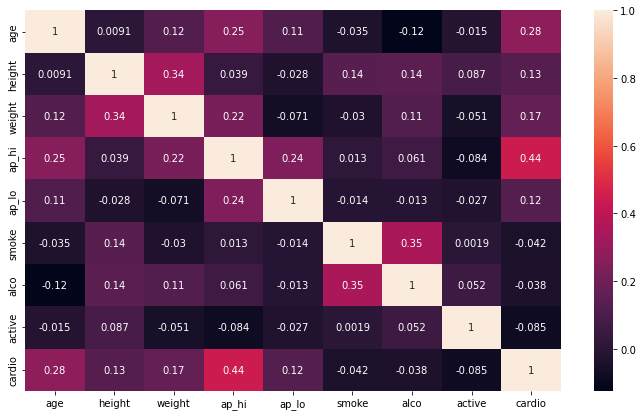

In [26]:
plt.subplots(figsize=(12,7))
sns.heatmap(original_df.drop(columns = 'id').corr(), annot = True)

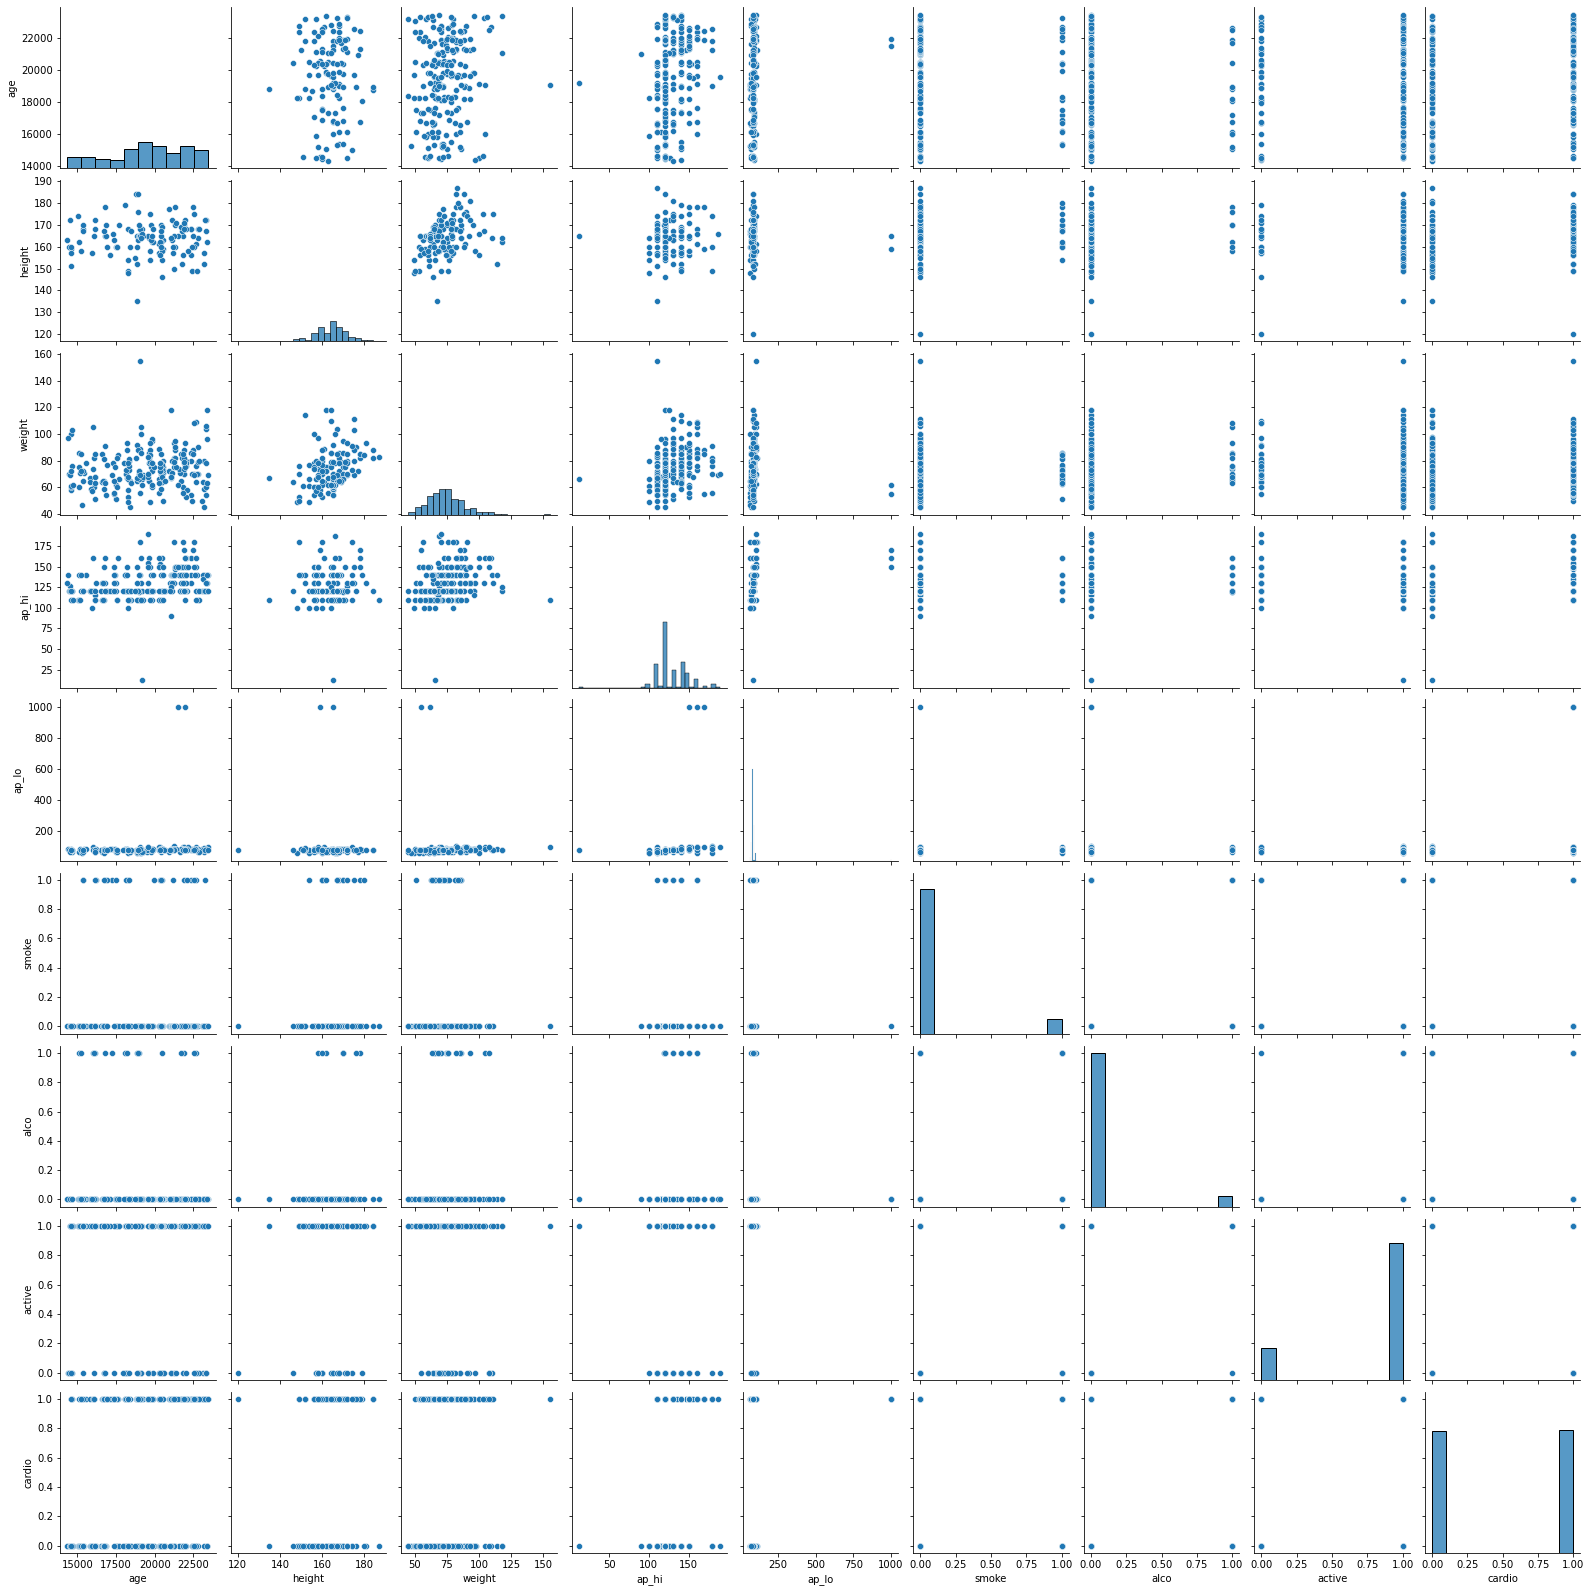

In [27]:
# ii. plotScatterMatrix
sns.pairplot(original_df.drop(columns = 'id')) # pairplot which is same as pandas.plotting.scatter_matrix()

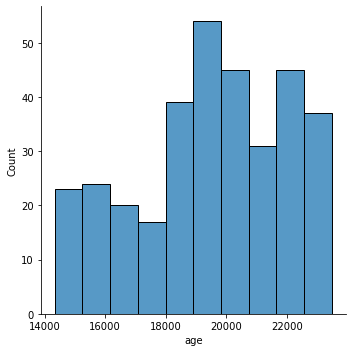

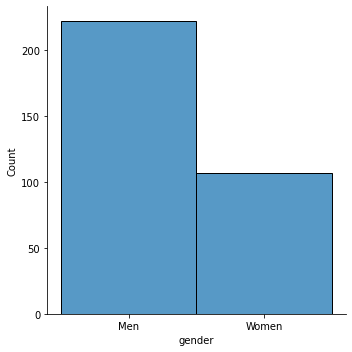

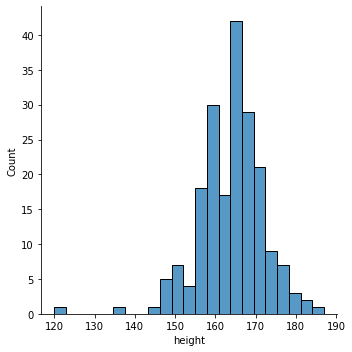

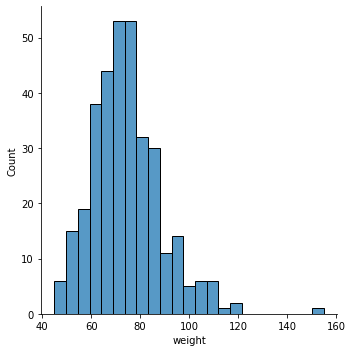

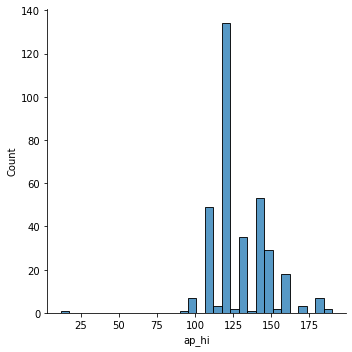

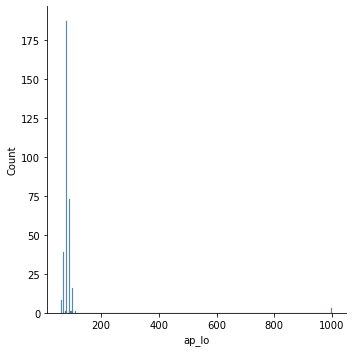

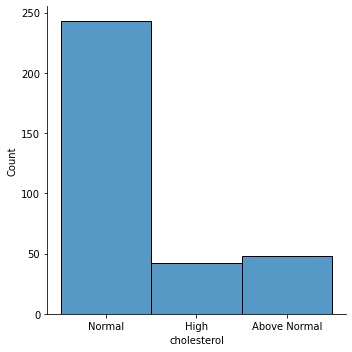

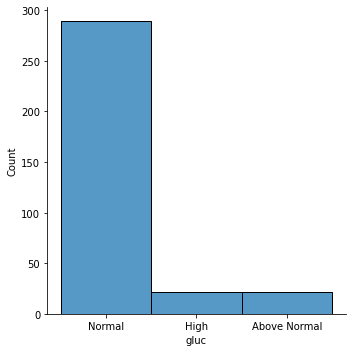

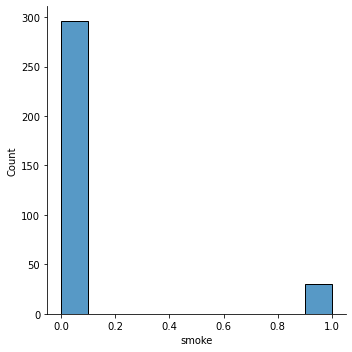

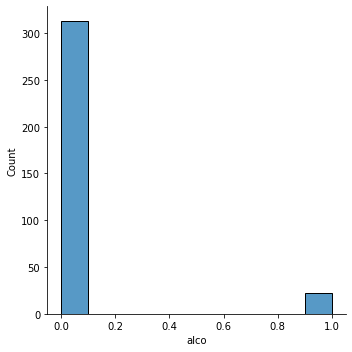

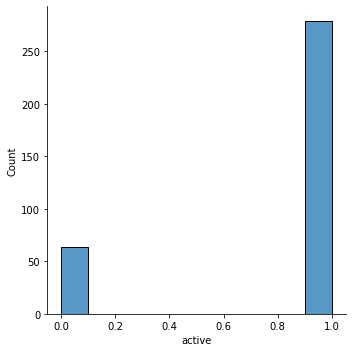

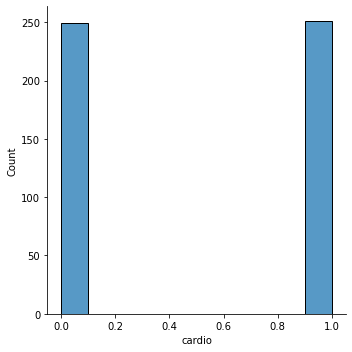

In [28]:
# iii. plotPerColumnDistribution
columns = list(original_df.drop(columns = 'id').columns)
for cols in columns:
    sns.displot(data=original_df,x=cols)

In [29]:
# boxplots
def box_fig(df):
    fig, ax = plt.subplots(ncols=2, figsize=(20,10))
    plt.tight_layout(pad=18)
    sns.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
    sns.boxplot(data=df, x='cardio', y='weight', showfliers=False, ax=ax[1], color=base_color)
    ax[0].title.set_text('Age')
    ax[0].set_xticklabels(['No-cardio', 'Cardio'])
    ax[1].title.set_text('weight')
    ax[1].set_xticklabels(['No-cardio', 'Cardio'])
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    #plt.savefig('box_fig.jpeg')

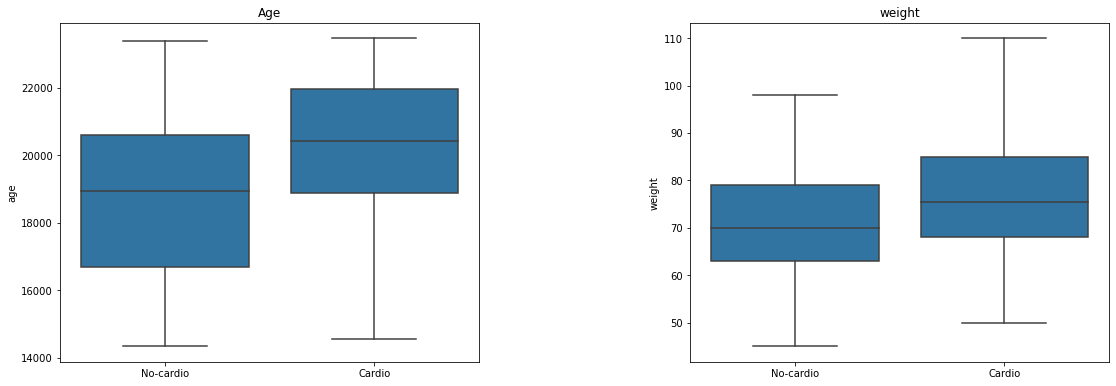

In [30]:
box_fig(original_df)

##### i. Find missing values

In [31]:
# i. Get the count of missing values
original_df.isnull().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

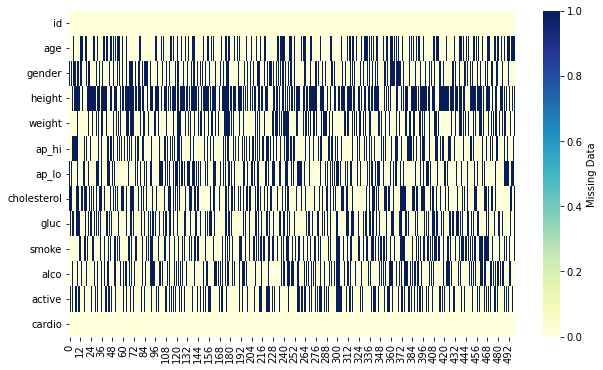

In [32]:
# ii. Plot a heat map for missing values
plt.figure(figsize=(10,6))
sns.heatmap(original_df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.savefig('missing_hm.jpeg')

In [33]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

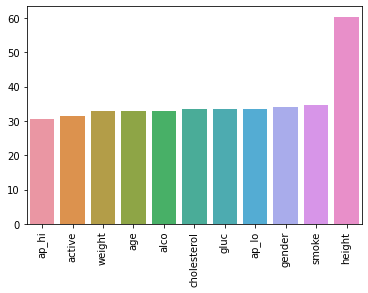

In [34]:
percent_nan = percent_missing(original_df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.savefig('missing_data.jpeg')

##### j. Applying a different technique to handle missing values (For each technique verify your prediction results)

In [35]:
train_df = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\1LAB\Lab1\Datasets/cardio-train.csv",sep = ';')
test_df = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\1LAB\Lab1\Datasets/cardio-test.csv",sep = ',')
val_df = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\1LAB\Lab1\Datasets/cardio-validation.csv",sep = ',')

In [37]:
# combining train and validation dataset
missing_data_exp_df = pd.concat([train_df,val_df]).reset_index(drop=True)
missing_data_exp_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68639,NaN,Men,164.0,72.0,140.0,80.0,Normal,Normal,0.0,NaN,NaN,1
996,35524,15851.0,Men,159.0,NaN,90.0,60.0,NaN,Normal,0.0,0.0,1.0,0
997,43938,21010.0,Men,168.0,NaN,NaN,90.0,Normal,Normal,0.0,NaN,1.0,1
998,1487,NaN,Women,170.0,87.0,120.0,NaN,Normal,NaN,0.0,0.0,NaN,0


In [38]:
# droping outliers
drop_ind = missing_data_exp_df[(missing_data_exp_df['ap_lo']>800) | (missing_data_exp_df['ap_hi']<15)].index
missing_data_exp_df = missing_data_exp_df.drop(drop_ind,axis = 0)

In [39]:
# i. Use dropna

In [40]:
dropna_df = missing_data_exp_df.copy()

In [41]:
dropna_df = dropna_df.dropna()

In [42]:
dropna_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
90,25306,17500.0,Women,160.0,62.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
146,91154,19802.0,Men,162.0,72.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,1
166,69120,14553.0,Men,157.0,60.0,110.0,75.0,Normal,Above Normal,0.0,0.0,0.0,1
187,68932,20482.0,Women,169.0,64.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
200,48446,22359.0,Women,168.0,86.0,160.0,90.0,Above Normal,Normal,1.0,0.0,1.0,1
351,99244,21373.0,Men,171.0,75.0,150.0,90.0,Normal,Normal,0.0,0.0,0.0,1
453,84726,21933.0,Men,172.0,93.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
507,93200,18032.0,Women,170.0,79.0,150.0,80.0,Normal,High,0.0,0.0,1.0,1
527,43327,14796.0,Women,162.0,60.0,120.0,80.0,Normal,Normal,0.0,0.0,1.0,0
541,86356,14470.0,Men,165.0,63.0,110.0,70.0,Normal,Normal,0.0,0.0,1.0,0


In [43]:
# ii. Use replace NA with zero or max value

In [44]:
# finding value counts of categorical features
categorical_columns = ['gender', 'cholesterol', 'gluc']
for cols in categorical_columns:
    print(f"Split in {cols} column\n{missing_data_exp_df[cols].value_counts()}\n")

Split in gender column
Men      476
Women    244
Name: gender, dtype: int64

Split in cholesterol column
Normal          542
Above Normal     95
High             83
Name: cholesterol, dtype: int64

Split in gluc column
Normal          625
High             57
Above Normal     54
Name: gluc, dtype: int64



In [45]:
# filling the features with zero or min value
replace_zero_df = missing_data_exp_df.copy()

In [46]:
# filling the categorical features with min value counts
replace_zero_df['gender'] = replace_zero_df['gender'].replace(np.nan, 'Women')
replace_zero_df['cholesterol'] = replace_zero_df['cholesterol'].replace(np.nan, 'High')
replace_zero_df['gluc'] = replace_zero_df['gluc'].replace(np.nan, 'Above normal')

In [47]:
# filling the numerical features with zero
replace_zero_df = replace_zero_df.replace(np.nan, 0)

In [48]:
replace_zero_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,Women,163.0,75.0,120.0,0.0,High,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,High,Above normal,0.0,0.0,0.0,0
2,10483,19761.0,Women,170.0,75.0,120.0,0.0,High,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,0.0,89.0,0.0,80.0,Normal,Above normal,0.0,0.0,0.0,0
4,85542,0.0,Women,158.0,74.0,0.0,93.0,High,Above normal,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68639,0.0,Men,164.0,72.0,140.0,80.0,Normal,Normal,0.0,0.0,0.0,1
996,35524,15851.0,Men,159.0,0.0,90.0,60.0,High,Normal,0.0,0.0,1.0,0
997,43938,21010.0,Men,168.0,0.0,0.0,90.0,Normal,Normal,0.0,0.0,1.0,1
998,1487,0.0,Women,170.0,87.0,120.0,0.0,Normal,Above normal,0.0,0.0,0.0,0


In [49]:
# filling the features with max value
replace_max_df = missing_data_exp_df.copy()

In [50]:
# filling the categorical features with max value counts
replace_max_df['gender'] = replace_max_df['gender'].replace(np.nan, 'Men')
replace_max_df['cholesterol'] = replace_max_df['cholesterol'].replace(np.nan, 'Normal')
replace_max_df['gluc'] = replace_max_df['gluc'].replace(np.nan, 'Normal')

In [51]:
# filling the numerical features with max values
for cols in replace_max_df.columns:
    replace_max_df[cols] = replace_max_df[cols].replace(np.nan, replace_max_df[cols].max())

In [52]:
replace_max_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,Men,163.0,75.0,120.0,120.0,Normal,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,Normal,Normal,0.0,0.0,1.0,0
2,10483,19761.0,Men,170.0,75.0,120.0,120.0,Normal,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,191.0,89.0,190.0,80.0,Normal,Normal,0.0,1.0,1.0,0
4,85542,23603.0,Men,158.0,74.0,190.0,93.0,High,Normal,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68639,23603.0,Men,164.0,72.0,140.0,80.0,Normal,Normal,0.0,1.0,1.0,1
996,35524,15851.0,Men,159.0,155.0,90.0,60.0,Normal,Normal,0.0,0.0,1.0,0
997,43938,21010.0,Men,168.0,155.0,190.0,90.0,Normal,Normal,0.0,1.0,1.0,1
998,1487,23603.0,Women,170.0,87.0,120.0,120.0,Normal,Normal,0.0,0.0,1.0,0


In [53]:
# iii. Use replace NA with mean

In [54]:
replace_mean_df = missing_data_exp_df.copy()

In [55]:
# filling the categorical features with random values
replace_mean_df['gender'] = replace_mean_df['gender'].replace(np.nan, 'Women')
replace_mean_df['cholesterol'] = replace_mean_df['cholesterol'].replace(np.nan, 'Normal')
replace_mean_df['gluc'] = replace_mean_df['gluc'].replace(np.nan, 'Normal')

In [56]:
# filling nominal(binary) features with zeros
nominal_columns = ['smoke', 'alco', 'active']
for cols in nominal_columns:
    replace_mean_df[cols] = replace_mean_df[cols].replace(np.nan, 0)

In [57]:
# filling the numerical features with mean values
for cols in replace_mean_df.drop(columns = ['gender', 'cholesterol', 'gluc','smoke','alco','active']).columns:
    replace_mean_df[cols] = replace_mean_df[cols].replace(np.nan, round(replace_mean_df[cols].mean()))

In [58]:
replace_mean_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [59]:
# iv. Search for additional techniques to handle null values, excluding the above threeandtest

In [60]:
# filling the misssing values with interpolate

In [61]:
interpolate_df = missing_data_exp_df.copy()

In [62]:
interpolate_df = interpolate_df.interpolate()

In [63]:
# filling the categorical features with random values
interpolate_df['gender'] = interpolate_df['gender'].replace(np.nan, 'Women')
interpolate_df['cholesterol'] = interpolate_df['cholesterol'].replace(np.nan, 'Normal')
interpolate_df['gluc'] = interpolate_df['gluc'].replace(np.nan, 'Normal')

# filling nominal(binary) features with zeros
nominal_columns = ['smoke', 'alco', 'active']
for cols in nominal_columns:
    interpolate_df[cols] = interpolate_df[cols].replace(np.nan, 0)
    
interpolate_df['ap_lo'] = interpolate_df['ap_lo'].fillna(interpolate_df['ap_lo'].mean())
interpolate_df = interpolate_df.round()
interpolate_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,Women,163.0,75.0,120.0,81.0,Normal,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,Normal,Normal,0.0,0.0,1.0,0
2,10483,19761.0,Women,170.0,75.0,120.0,75.0,Normal,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,164.0,89.0,133.0,80.0,Normal,Normal,0.0,0.0,1.0,0
4,85542,17902.0,Women,158.0,74.0,147.0,93.0,High,Normal,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,68639,16182.0,Men,164.0,72.0,140.0,80.0,Normal,Normal,0.0,0.0,1.0,1
996,35524,15851.0,Men,159.0,77.0,90.0,60.0,Normal,Normal,0.0,0.0,1.0,0
997,43938,21010.0,Men,168.0,82.0,105.0,90.0,Normal,Normal,0.0,0.0,1.0,1
998,1487,21010.0,Women,170.0,87.0,120.0,85.0,Normal,Normal,0.0,0.0,0.0,0


##### k. Applying the feature scaling technique if you think it is required. (Optional)

##### l. Applying the regression models that you think is most suited for this problem.

Data Preparation

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [65]:
def sub(pred, **kwargs):
    submission = pd.DataFrame({'id':test_df['id'],'cardio':pred})
    file = submission.to_csv(kwargs['name']+'.csv',index=False)
    print('Saved file: ' + kwargs['name'])
    return file

In [66]:
def cat_to_num(df): 
    LabelEncoder_X= LabelEncoder()
    df['gender'] = LabelEncoder_X.fit_transform(df['gender'])
    df['cholesterol'] = LabelEncoder_X.fit_transform(df['cholesterol'])
    df['gluc'] = LabelEncoder_X.fit_transform(df['gluc'])
    return df

In [67]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None

In [68]:
# def gender(x, y):
#     if x==1:
#         return 'female'
#     else:
#         return 'male'

def imp_feat(df):

    # calculating bmi
    df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

    # age days to years 
    df['age'] = df['age'].map(lambda x:round(x/365))

    # inserting bllod pressure catogories
    df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
    df['bp_cat'].value_counts()
    
    # Inserting separate columns for gender
    df.insert(3, "female", (df['gender']==1).astype(int))
    df.insert(4, 'male', (df['gender']==0).astype(int))
    
    df.drop(['gender'], axis=1, inplace=True)
    df = df.drop(columns = 'id')
    return df

Preparing test data

In [69]:
tst_df = test_df.copy()
tst_df = cat_to_num(tst_df)
tst_df = imp_feat(tst_df)
tst_df = tst_df.drop(columns='bp_cat')
tst_df

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,55,0,1,156,57.0,23.42,110,70,2,2,0,1,0
1,50,0,1,160,60.0,23.44,120,80,2,2,0,0,1
2,56,1,0,170,80.0,27.68,140,69,2,2,0,0,1
3,64,0,1,158,80.0,32.05,160,90,1,2,0,0,1
4,56,0,1,158,92.0,36.85,140,90,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,54,0,1,162,64.0,24.39,110,70,2,2,0,0,1
246,53,0,1,162,80.0,30.48,150,90,1,2,0,0,1
247,51,0,1,170,62.0,21.45,120,60,2,2,0,0,1
248,54,0,1,162,95.0,36.20,130,80,2,2,0,0,1


Drop columns and renaming datasets for training different models

In [70]:
# testing data
X_test = tst_df.copy()
X_test_no_bmi = tst_df.drop(columns = 'bmi').copy()

#### dropna_df

In [71]:
dropna_df1 = dropna_df.copy()
dropna_df1 = cat_to_num(dropna_df1)
dropna_df1 = imp_feat(dropna_df1)

X_train_dropna_df1 = dropna_df1.drop(['cardio', 'bp_cat'], axis=1)
y_train_dropna_df1 = dropna_df1['cardio']

#### replace_zero_df

In [72]:
replace_zero_df1 = replace_zero_df.copy()
replace_zero_df1 = cat_to_num(replace_zero_df1)
replace_zero_df1 = imp_feat(replace_zero_df1)

X_train_replace_zero_df1 = replace_zero_df1.drop(['cardio', 'bp_cat', 'bmi'], axis=1)
y_train_replace_zero_df1 = replace_zero_df1['cardio']

#### replace_max_df

In [73]:
replace_max_df1 = replace_max_df.copy()
replace_max_df1 = cat_to_num(replace_max_df1)
replace_max_df1 = imp_feat(replace_max_df1)

X_train_replace_max_df1 = replace_max_df1.drop(['cardio', 'bp_cat'], axis=1)
y_train_replace_max_df1 = replace_max_df1['cardio']

#### replace_mean_df

In [74]:
replace_mean_df1 = replace_mean_df.copy()
replace_mean_df1 = cat_to_num(replace_mean_df1)
replace_mean_df1 = imp_feat(replace_mean_df1)

X_train_replace_mean_df1 = replace_mean_df1.drop(['cardio', 'bp_cat'], axis=1)
y_train_replace_mean_df1 = replace_mean_df1['cardio']

#### interpolate_df

In [75]:
interpolate_df1 = interpolate_df.copy()
interpolate_df1 = cat_to_num(interpolate_df1)
interpolate_df1 = imp_feat(interpolate_df1)

X_train_interpolate_df1 = interpolate_df1.drop(['cardio', 'bp_cat'], axis=1)
y_train_interpolate_df1 = interpolate_df1['cardio']

### Logistic Regression

In [76]:
def logistic_reg(X_train,y_train,X_test):
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)
    logreg_pred = logreg_model.predict(X_test)
    Train_accuracy = accuracy_score(y_train,logreg_model.predict(X_train))
    print(f"Train accuracy : {Train_accuracy}")
    return logreg_pred

In [77]:
# Predictions of dropna_df, kaggle accuracy = 67.2

logreg_pred_dropna_df = logistic_reg(X_train_dropna_df1,y_train_dropna_df1,X_test) 
# sub(logreg_pred_dropna_df, name='Logistic_reg_dropna_df')

Train accuracy : 0.7441860465116279


In [78]:
# Predictions of replace_zero_df, kaggle accuracy=70.4

logreg_pred_replace_zero_df = logistic_reg(X_train_replace_zero_df1,y_train_replace_zero_df1,X_test_no_bmi) 
# sub(logreg_pred_replace_zero_df, name='Logistic_reg_replace_zero_df')

Train accuracy : 0.604251012145749


In [79]:
# Predictions of replace_max_df, kaggle accuracy=69.6

logreg_pred_replace_max_df = logistic_reg(X_train_replace_max_df1,y_train_replace_max_df1,X_test) 
# sub(logreg_pred_replace_max_df, name='Logistic_reg_replace_max_df')

Train accuracy : 0.6204453441295547


In [80]:
# Predictions of replace_mean_df, kaggle accuracy=70.4

logreg_pred_replace_mean_df = logistic_reg(X_train_replace_mean_df1,y_train_replace_mean_df1,X_test) 
# sub(logreg_pred_replace_mean_df, name='Logistic_reg_replace_mean_df')

Train accuracy : 0.708502024291498


In [118]:
# Predictions of interpolate_df, kaggle accuracy=

logreg_pred_interpolate_df = logistic_reg(X_train_interpolate_df1,y_train_interpolate_df1,X_test) 
#sub(logreg_pred_interpolate_df, name='Logistic_reg_interpolate_df')

Train accuracy : 0.6852226720647774


### SVM

In [82]:
def svc(X_train,y_train,X_test,C):
    svc_model = SVC(C=C, gamma=0.00001, kernel="rbf", random_state=42)
    svc_model.fit(X_train,y_train)
    svc_pred = svc_model.predict(X_test)
    Train_accuracy = accuracy_score(y_train,svc_model.predict(X_train))
    print(f"Train accuracy : {Train_accuracy}")
    return svc_pred 

In [83]:
# Predictions of dropna_df, kaggle accuracy = 69.6 when using linear kernal accuracy = 53.6

In [84]:
svc_param_grid = {'C': [40,50,60],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
grid.fit(X_train_dropna_df1, y_train_dropna_df1) 

# find best params
grid.best_params_

{'C': 40, 'gamma': 1e-05, 'kernel': 'rbf'}

In [85]:
svc_pred_dropna_df = svc(X_train_dropna_df1, y_train_dropna_df1,X_test,40)
# sub(svc_pred_dropna_df, name='svc_dropna_df')

Train accuracy : 0.7441860465116279


In [86]:
# Predictions of replace_zero_df, kaggle accuracy = 70.4

In [87]:
svc_param_grid = {'C': [80,100,120],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
rs = RandomizedSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
rs.fit(X_train_replace_zero_df1,y_train_replace_zero_df1) 

# find best params
rs.best_params_

{'kernel': 'rbf', 'gamma': 1e-05, 'C': 120}

In [88]:
svc_pred_replace_zero_df = svc(X_train_replace_zero_df1,y_train_replace_zero_df1,X_test_no_bmi,120)
# sub(svc_pred_replace_zero_df, name='svc_replace_zero_df')

Train accuracy : 0.7246963562753036


In [89]:
# Predictions of replace_max_df, kaggle accuracy = 68.0

In [90]:
svc_param_grid = {'C': [40,50,60],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
rs = RandomizedSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
rs.fit(X_train_replace_max_df1,y_train_replace_max_df1) 

# find best params
rs.best_params_

{'kernel': 'rbf', 'gamma': 1e-05, 'C': 50}

In [91]:
svc_pred_replace_max_df = svc(X_train_replace_max_df1,y_train_replace_max_df1,X_test,50)
# sub(svc_pred_replace_max_df, name='svc_replace_max_df')

Train accuracy : 0.6831983805668016


In [92]:
# Predictions of replace_mean_df, kaggle accuracy = 72.8

In [93]:
svc_param_grid = {'C': [40,50,60,100],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
grid.fit(X_train_replace_mean_df1,y_train_replace_mean_df1)

grid.best_params_

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}

In [120]:
svc_pred_replace_mean_df = svc(X_train_replace_mean_df1,y_train_replace_mean_df1,X_test,100)
#sub(svc_pred_replace_mean_df, name='svc_replace_mean_df')

Train accuracy : 0.7054655870445344


In [95]:
# Predictions of interpolate_df, kaggle accuracy = 69.6

In [96]:
svc_param_grid = {'C': [40,50,60],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
rs = RandomizedSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
rs.fit(X_train_interpolate_df1,y_train_interpolate_df1) 

# find best params
rs.best_params_

{'kernel': 'rbf', 'gamma': 1e-06, 'C': 60}

In [97]:
svc_pred_interpolate_df = svc(X_train_interpolate_df1,y_train_interpolate_df1,X_test,60)
# sub(svc_pred_interpolate_df, name='svc_interpolate_df')

Train accuracy : 0.6852226720647774


##### The best results so far are from replace_mean_df. We will experiment on replace_mean_df from here on

In [98]:
# Ridge classifier, kaggle accuracy = 72

def ridgeclf(X_train,y_train):  
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(X_train,y_train)
    ridge_pred = ridge_classifier.predict(X_test)
    print(f"Train accuracy: {round(ridge_classifier.score(X_train, y_train) * 100, 2)}")
    return ridge_pred 

In [99]:
ridgeclf_pred = ridgeclf(X_train_replace_mean_df1,y_train_replace_mean_df1)
# sub(ridgeclf_pred, name='ridgeclf_pred')

Train accuracy: 71.66


In [100]:
dtp = {'max_depth': [3,5,7,10],
 'min_samples_leaf': [1,3,5,7],
       'criterion': ['gini','entropy']}

In [101]:
dtm = RandomizedSearchCV(DecisionTreeClassifier(),
                              param_distributions = dtp,
                              n_iter = 100,
                              cv = 5, verbose=0,
                              random_state=0,
                              n_jobs = -1)

In [102]:
dtm.fit(X_train_replace_mean_df1,y_train_replace_mean_df1)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 3, 5, 7]},
                   random_state=0)

In [103]:
dtm.best_params_

{'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}

In [104]:
# Decision Tree Classifier, kaggle accuracy = 67.2

def decisiontree(X_train,y_train,crit,depth):
    decision_tree = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    decision_tree.fit(X_train,y_train)
    decision_pred = decision_tree.predict(X_test)
    print(f"Train accuracy: {round(decision_tree.score(X_train, y_train) * 100, 2)}")
    return decision_pred

In [105]:
decision_pred = decisiontree(X_train_replace_mean_df1,y_train_replace_mean_df1,'entropy',3)
# sub(decision_pred, name='decision_pred')

Train accuracy: 71.66


In [106]:
rrfp = {'max_depth': [3,5,7,10],
 'min_samples_leaf': [1,3,5,7],
 'n_estimators': [20,35,51]}

In [107]:
rrfm = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = rrfp,
                              n_iter = 100,
                              cv = 5, verbose=0,
                              random_state=0,
                              n_jobs = -1)

In [108]:
rrfm.fit(X_train_replace_mean_df1,y_train_replace_mean_df1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'n_estimators': [20, 35, 51]},
                   random_state=0)

In [109]:
rrfm.best_params_

{'n_estimators': 35, 'min_samples_leaf': 7, 'max_depth': 7}

In [110]:
# Random Forest Classifier, kaggle accuracy = 69.6

def random_forest(X_train,y_train,depth,est,leaf):
    random_model = RandomForestClassifier(n_estimators=est, max_depth=depth, min_samples_leaf=leaf, random_state=0)
    random_model.fit(X_train,y_train)
    random_pred = random_model.predict(X_test)
    print(f"Train accuracy: {round(random_model.score(X_train, y_train) * 100, 2)}")
    return random_pred

In [111]:
random_pred = random_forest(X_train_replace_mean_df1,y_train_replace_mean_df1,7,51,7)
# sub(random_pred, name='random_pred')

Train accuracy: 78.04


#### Best Model - SVM model with replace_mean_df with kaggle accuracy 72.8

<AxesSubplot:xlabel='bp_cat', ylabel='cardio'>

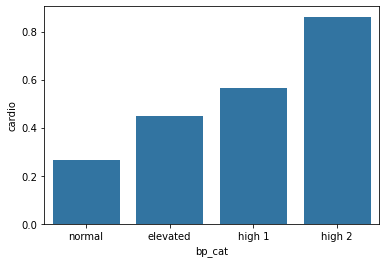

In [112]:
# Visualizing bp_cat from the best model

df_bp = replace_mean_df1.groupby('bp_cat').mean()
sns.barplot(data=df_bp, x=df_bp.index, y='cardio', color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2'])
#plt.savefig('bar_bpcat.jpeg')

##### m. At least one of the models used to compute should be your own implementation using NumPy.

In [113]:
X = replace_mean_df1.drop(['cardio', 'bp_cat'], axis=1)
y = replace_mean_df1['cardio']
t =  tst_df.copy() 

In [114]:
class LogisticRegression_own:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).astype(int)

In [115]:
model = LogisticRegression_own(lr=0.1, num_iter=300000)

In [116]:
model.fit(X, y)

In [121]:
preds = model.predict(X)
accuracy_score(y,preds)

0.6234817813765182

In [122]:
test_preds = model.predict(t)

Kaggle accuaracy: 57.6

#  TASK 2

##### 1. Split the dataset in train and test samples

In [123]:
cardio_complete_df = pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\1LAB\Lab1\Datasets/cardio-complete .csv",sep = ',')

In [124]:
cardio_complete_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66667,20252,Women,161,62.0,140,90,High,High,0,0,1,1
1,22956,21129,Men,166,66.0,125,70,Normal,Normal,1,0,1,0
2,40536,16602,Men,160,74.0,140,90,Normal,Normal,0,0,1,0
3,39712,15172,Men,167,77.0,120,80,Normal,Normal,0,0,1,0
4,82165,19858,Women,176,93.0,140,90,Above Normal,Normal,0,1,1,1


In [125]:
cardio_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender       1000 non-null   object 
 3   height       1000 non-null   int64  
 4   weight       1000 non-null   float64
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   object 
 8   gluc         1000 non-null   object 
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 101.7+ KB


In [126]:
df = cardio_complete_df.copy()

In [127]:
df.corr()['cardio'].sort_values()

active   -0.079619
height   -0.023277
smoke     0.023595
id        0.030383
alco      0.068030
ap_lo     0.121857
age       0.212669
weight    0.217365
ap_hi     0.399026
cardio    1.000000
Name: cardio, dtype: float64

##### Data preprocess

In [128]:
df.drop("id",axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df["bmi"] = round(df["weight"] / (df["height"]/100)**2)
df['age'] = df['age'].map(lambda x:round(x/365)) 
df = cat_to_num(df)
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
df = df[~out_filter]
len(df)

992

In [130]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,55,1,161,62.0,140,90,1,1,0,0,1,1,24.0
1,58,0,166,66.0,125,70,2,2,1,0,1,0,24.0
2,45,0,160,74.0,140,90,2,2,0,0,1,0,29.0
3,42,0,167,77.0,120,80,2,2,0,0,1,0,28.0
4,54,1,176,93.0,140,90,0,2,0,1,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,0,152,61.0,114,69,2,2,0,0,1,0,26.0
996,54,0,153,83.0,120,80,2,2,0,0,1,0,35.0
997,62,1,161,75.0,130,90,0,2,1,1,1,1,29.0
998,58,0,162,88.0,130,100,0,2,0,0,1,1,34.0


##### Model preparation

In [131]:
X = df.drop(["cardio"], axis=1)
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [132]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (793, 12)
Test shape: (199, 12)


##### 2. Applying the regression model that you think is most suited for this problem.

In [133]:
# Logistic Regression
def logreg2():
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)
    predictions = logreg_model.predict(X_test)
#     print(f"Train accuracy: {round(logreg_model.score(X_train, y_train) * 100, 2)}")
#     print(f"Test accuracy : {round(accuracy_score(y_test,predictions) * 100, 2)}")
    
    # confusion matrix sns heatmap 
    cm = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    df_cm = cm
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test,predictions))

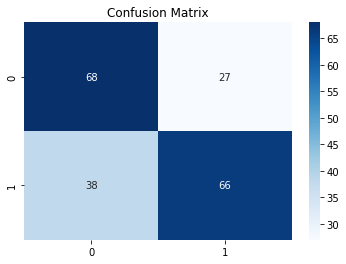

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        95
           1       0.71      0.63      0.67       104

    accuracy                           0.67       199
   macro avg       0.68      0.68      0.67       199
weighted avg       0.68      0.67      0.67       199



In [134]:
logreg2()

In [135]:
svc_param_grid = {'C': [40,50,60,100],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
grid.fit(X_train,y_train)

grid.best_params_

{'C': 60, 'gamma': 1e-05, 'kernel': 'rbf'}

In [136]:
# SVC
def svc2(C):
    svc_model = SVC(C=C, gamma=0.00001, kernel="rbf", random_state=42)
    svc_model.fit(X_train,y_train)
    predictions = svc_model.predict(X_test)
#     print(f"Train accuracy: {round(svc_model.score(X_train, y_train) * 100, 2)}")
#     print(f"Test accuracy : {round(accuracy_score(y_test,predictions) * 100, 2)}")
    
    # confusion matrix sns heatmap
    cm = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    df_cm = cm
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test,predictions))

In [137]:
svc_param_grid = {'C': [40,50,60,100],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
grid.fit(X_train,y_train)

grid.best_params_

{'C': 60, 'gamma': 1e-05, 'kernel': 'rbf'}

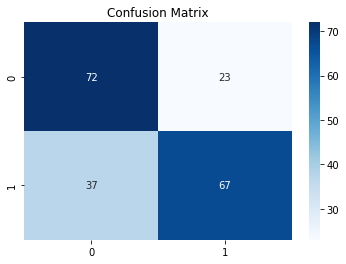

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        95
           1       0.74      0.64      0.69       104

    accuracy                           0.70       199
   macro avg       0.70      0.70      0.70       199
weighted avg       0.70      0.70      0.70       199



In [138]:
svc2(60)

In [139]:
def ridgeclf2():  
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(X_train,y_train)
    predictions = ridge_classifier.predict(X_test)
#     print(f"Train accuracy: {round(ridge_classifier.score(X_train, y_train) * 100, 2)}")
#     print(f"Test accuracy : {round(accuracy_score(y_test,predictions) * 100, 2)}")
    
    # confusion matrix sns heatmap
    cm = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    df_cm = cm
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test,predictions))
    

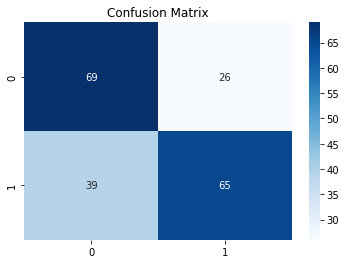

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        95
           1       0.71      0.62      0.67       104

    accuracy                           0.67       199
   macro avg       0.68      0.68      0.67       199
weighted avg       0.68      0.67      0.67       199



In [140]:
ridgeclf2()

In [141]:
dtp = {'max_depth': [3,5,7,10],
 'min_samples_leaf': [1,3,5,7],
       'criterion': ['gini','entropy']}

In [142]:
dtm = RandomizedSearchCV(DecisionTreeClassifier(),
                              param_distributions = dtp,
                              n_iter = 100,
                              cv = 5, verbose=0,
                              random_state=0,
                              n_jobs = -1)

In [143]:
dtm.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 3, 5, 7]},
                   random_state=0)

In [144]:
dtm.best_params_

{'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy'}

In [145]:
# Decision Tree Classifier

def decisiontree2(crit,depth):
    decision_tree = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    decision_tree.fit(X_train,y_train)
    predictions = decision_tree.predict(X_test)
#     print(f"Train accuracy: {round(decision_tree.score(X_train, y_train) * 100, 2)}")
#     print(f"Test accuracy : {round(accuracy_score(y_test,predictions) * 100, 2)}")
    
    # confusion matrix sns heatmap
    cm = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    df_cm = cm
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test,predictions))
    return predictions


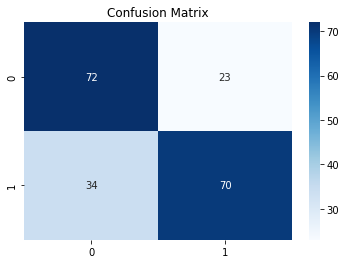

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        95
           1       0.75      0.67      0.71       104

    accuracy                           0.71       199
   macro avg       0.72      0.72      0.71       199
weighted avg       0.72      0.71      0.71       199



In [146]:
best_pred2 = decisiontree2('gini',3)

In [147]:
rrfp = {'max_depth': [3,5,7,10],
 'min_samples_leaf': [1,3,5,7],
 'n_estimators': [20,35,51]}

In [148]:
rrfm = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = rrfp,
                              n_iter = 100,
                              cv = 5, verbose=0,
                              random_state=0,
                              n_jobs = -1)

In [149]:
rrfm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'n_estimators': [20, 35, 51]},
                   random_state=0)

In [150]:
rrfm.best_params_

{'n_estimators': 35, 'min_samples_leaf': 7, 'max_depth': 5}

In [151]:
# Random Forest Classifier

def random_forest2(depth,est,leaf):
    random_model = RandomForestClassifier(n_estimators=est, max_depth=depth, min_samples_leaf=leaf, random_state=0)
    random_model.fit(X_train, y_train)
    predictions = random_model.predict(X_test)
#     print(f"Train accuracy: {round(random_model.score(X_train, y_train) * 100, 2)}")
#     print(f"Test accuracy : {round(accuracy_score(y_test,predictions) * 100, 2)}")
    
    # confusion matrix sns heatmap
    cm = confusion_matrix(y_test, predictions)
    ax = plt.axes()
    df_cm = cm
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test,predictions))

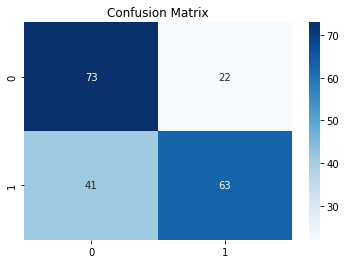

              precision    recall  f1-score   support

           0       0.64      0.77      0.70        95
           1       0.74      0.61      0.67       104

    accuracy                           0.68       199
   macro avg       0.69      0.69      0.68       199
weighted avg       0.69      0.68      0.68       199



In [152]:
random_forest2(3,100,5)

##### 3. Compare your prediction result with the first technique.

- In task 1 the best result we obtained was from SVM model whereas, for the similar dataset the best model in task 2 was decision tree. 
- Comparing precision recall and f1-score for SVM and Decision Tree in task 2 models. Decision tree model precision was slightly better compared to SVM model in both target values (0 and 1). Thought both model’s recall of target value 0 was the same decision tree’s performance was better for the target value 1. Also, weighed average f1-score was slightly better with 0.01 percent in decision tree.
- As a result, both the models performed well but decision tree had the slight edge and gave the best result for task 2. 


# TASK 3

##### a. Apply feature transform on the features used in task 1

In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
X = replace_mean_df1.drop(['cardio', 'bp_cat'], axis=1)
y = replace_mean_df1['cardio']
Xt = tst_df.copy()

In [155]:
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)
Xt_poly = poly.fit_transform(Xt)

In [156]:
X_poly.shape

(988, 105)

In [160]:
# Logistic regression
poly_logreg_model = LogisticRegression()
poly_logreg_model.fit(X_poly, y)
poly_logreg_pred = poly_logreg_model.predict(Xt_poly)
Train_accuracy = accuracy_score(y,poly_logreg_model.predict(X_poly))
print(f"Train accuracy : {Train_accuracy}")

Train accuracy : 0.7054655870445344


Kaggle/test accuracy: 68.8

In [161]:
# SVC

In [162]:
svc_param_grid = {'C': [40,50,60,100],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 

# fitting the model for grid search 
grid.fit(X_poly,y)

grid.best_params_

{'C': 40, 'gamma': 1e-06, 'kernel': 'rbf'}

In [163]:
# Overfiting can be seen claerly in this model

poly_svc_model = SVC(C=40, gamma=0.000001, kernel="rbf", random_state=42)
poly_svc_model.fit(X_poly,y)
poly_svc_pred = poly_svc_model.predict(Xt_poly)
Train_accuracy = accuracy_score(y,poly_svc_model.predict(X_poly))
print(f"Train accuracy : {Train_accuracy}")

Train accuracy : 0.9919028340080972


Kaggle/Test accuracy = 56.7

##### a. Does varying the polynomial degree change your accuracy?

YES, It changes the accuracy. In task 1 SVM model and logistic regression accurracies was 70.4 and 72.8 for the kaggle test data. With polynomial regression the accuracy score is 56.7 for SVM model and 68.8 for logistic regression model.

###### b. Can you identifyifyourmodel isunderfitting oroverfitting? (Hintuse cross- validation error and in-sample error plot to identify high bias and high variance.) Plot therelationships.

In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
log_cv_scores = cross_val_score(poly_logreg_model,X_poly,y,cv=5,scoring='accuracy')
log_cv_scores.mean()

0.7004255755524791

In [166]:
svc_cv_scores = cross_val_score(poly_svc_model,X_poly,y,cv=5,scoring='accuracy')
svc_cv_scores.mean()

0.6224170640414296

Using cross validation we found the mean accuracy which is 62.2, from kaggle we found the test accuracy which is 56.7. As the train accuracy is much higher than test accuracy we see overfitting or high variance in the model.

In [168]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

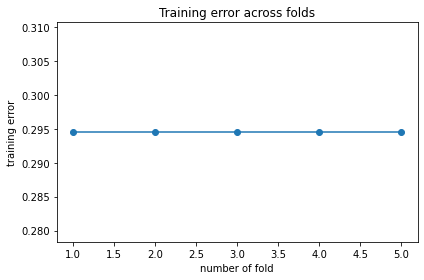

In [169]:
# Logistic regression cv error plot
kf = KFold(n_splits=5)
list_training_error = []
for train_index, test_index in kf.split(X):
    model = LogisticRegression()
    model.fit(X_poly,y)
    y_pred = model.predict(X_poly)
    fold_training_error = mean_absolute_error(y, y_pred) 
    list_training_error.append(fold_training_error)
    
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.show()

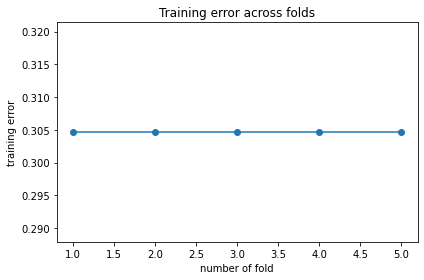

In [170]:
# SVM CV error plot
kf = KFold(n_splits=5)
list_training_error = []
for train_index, test_index in kf.split(X):
    model = SVC()
    model.fit(X_poly,y)
    y_pred = model.predict(X_poly)
    fold_training_error = mean_absolute_error(y, y_pred) 
    list_training_error.append(fold_training_error)
    
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
#plt.show()
plt.savefig('cverr.jpeg')

From the above plots we can see the mean absolute error betweem target and each kfolds prediction. Every folds prediction where the same so the error for every fold was also same.